# Transjakarta  Route and Corridor Analysis (For BRT)

## Latar Belakang
Transjakarta merupakan moda transportasi umum yang digunakan khususnya di daerah Jakarta. Transjakarta sudah beroperasi sejak 2004 dan telah menjadi salah satu solusi untuk mengurangi kemacetan di ibu kota. Selama perjalannya, Transjakarta mengalami beberapa permasalahan seperti kepadatan penumpang, rute, dan juga ketersediaan koridor. Kepadatan penumpang sering kali terjadi pada jam-jam sibuk, dan hal ini mempengaruhi kenyamanan serta efisiensi layanan, khususnya keterlambatan kedatangan tiap-tiap koridor.

## Rumusan Masalah
Dari permasalahan yang ada, berikut adalah rumusan masalah yang dihadapi Transjakarta:

1. Bagaimana cara mengidentifikasi koridor yang memiliki jumlah penumpang yang ramai dan tidak ramai?
1. Apa saja rute-rute yang sering dilalui oleh penumpang?
1. Bagaimana menganalisis waktu operasional satu koridor transjakarta?

## Tujuan Analisis
Berdasarkan rumusan masalah di atas, tujuan dari analisis ini adalah:

1. Mengidentifikasi koridor dengan jumlah penumpang tinggi dan rendah, sebagai dasar untuk pengambilan keputusan terkait kapasitas layanan.
1. Mengidentifikasi rute yang paling sering dilalui oleh penumpang untuk memahami kebutuhan utama rute perjalanan.
1. Menganalisis waktu operasional pada satu koridor untuk menemukan pola jam sibuk dan memberikan rekomendasi penyesuaian jadwal yang lebih sesuai dengan kebutuhan penumpang.

## Step by Step Analysis
1. **Pengumpulan Data:**
   - Kumpulkan data terkait penumpang, termasuk waktu tap-in dan tap-out, koridor, dan jumlah penumpang. Data ini dapat diperoleh dari sistem yang digunakan oleh Transjakarta atau melalui survei lapangan.

2. **Pembersihan Data:**
   - Pembersihan data dilakukan untuk memastikan tidak ada nilai yang hilang atau anomali yang dapat mempengaruhi analisis.

3. **Analisis Jam Tap-In:**
   - Kelompokkan data berdasarkan jam tap-in untuk menghitung jumlah penumpang di setiap jam.

4. **Visualisasi Data:**
   - Buat visualisasi (seperti barplot) untuk menunjukkan jumlah penumpang berdasarkan jam. Ini akan membantu dalam mengidentifikasi jam-jam puncak dengan kepadatan penumpang yang tinggi.

5. **Analisis Rute:**
   - Identifikasi rute yang paling banyak dilalui dengan menghitung frekuensi tap-in dan tap-out berdasarkan koridor dan halte.
   - estimasi waktu keterlambatan tiap-tiap koridor transjakarta

6. **Evaluasi dan Rekomendasi:**
   - Evaluasi hasil analisis dan berikan rekomendasi untuk perbaikan.

## Batasan Analisis
- Batasan analisis adalah analisis data untuk data koridor Transjakarta dengan tipe = **BRT**

link tableau : https://public.tableau.com/app/profile/bisma.adhira/viz/BismaAdhira_StoryandDashboard/Dashboard?publish=yes

## Load Modules and Dataset Transjakarta

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [470]:
df = pd.read_csv('/Users/ASUS/Documents/Bisma/JCDS/Capstone Project/2/transjakarta.csv')

# Data Cleaning

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [472]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

beberapa kolom masih perlu "dibersihkan" seperti handle missing values, dan data formatting yang tepat

In [473]:
df = df.drop(['transID','payCardID','tapInStops','tapOutStops'], axis  = 1)

In [474]:
 df[(~df['corridorID'].isna()) & (df['corridorName'].isna())].head(7)

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
38,dki,Rahayu Rahayu,F,2006,5M,NaN,1.0,PTUN Jakarta,-6.196388,106.84025,16,2023-04-03 05:29:43,Term. Kampung Melayu 2,-6.224516,106.86685,30.0,2023-04-03 05:58:35,3500.0
39,dki,"Dr. Zulfa Tamba, S.E.I",M,1986,2,NaN,0.0,Rawa Selatan,-6.173925,106.85809,9,2023-04-03 05:28:22,Monas,-6.176248,106.82286,19.0,2023-04-03 06:02:36,3500.0
60,online,Lutfan Hakim,M,2011,T21,NaN,1.0,GBK Pintu 7,-6.222095,106.80861,3,2023-04-03 05:43:48,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
61,emoney,Restu Waluyo,F,1984,12A,NaN,0.0,SMKN 56,-6.119094,106.79423,9,2023-04-03 06:13:03,Museum Fatahillah,-6.133930,106.81209,18.0,2023-04-03 06:50:23,3500.0
73,dki,"Danu Suartini, S.Farm",M,2010,M3,NaN,1.0,Sumur Bor,-6.153046,106.71929,2,2023-04-03 06:49:46,Bank Indonesia Arah Selatan,-6.184784,106.82326,14.0,2023-04-03 07:21:09,3500.0
89,dki,Samsul Ramadan,M,1966,M11,NaN,1.0,Pasar Pulo Gadung,-6.187434,106.90591,0,2023-04-03 06:23:36,Walikota Jakarta Timur,-6.212540,106.94537,7.0,2023-04-03 06:52:14,3500.0
112,dki,"drg. Gawati Uyainah, S.T.",M,1994,JAK.13,NaN,1.0,Simpang Kopi Bandengan Selatan,-6.135839,106.80689,6,2023-04-03 06:37:34,Ps. Tomas,-6.179192,106.81306,29.0,2023-04-03 07:13:31,0.0


### Ada corridorID yang tidak memiliki nama. Perlu dicari tahu apakah corridorID tersebut memang tidak memmiliki nama atau ada kesalahan

In [475]:
df[df['corridorID'] == 'M3']

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
73,dki,"Danu Suartini, S.Farm",M,2010,M3,NaN,1.0,Sumur Bor,-6.153046,106.71929,2,2023-04-03 06:49:46,Bank Indonesia Arah Selatan,-6.184784,106.82326,14.0,2023-04-03 07:21:09,3500.0
165,brizzi,Widya Nuraini,F,1994,M3,Kalideres - Bundaran HI via Veteran,1.0,Sumur Bor,-6.153046,106.71929,2,2023-04-03 06:15:16,Grogol 1,-6.166824,106.78971,10.0,2023-04-03 06:47:07,3500.0
265,dki,"Zizi Santoso, M.Kom.",M,1970,M3,Kalideres - Bundaran HI via Veteran,0.0,Grogol 1,-6.166824,106.78971,6,2023-04-03 06:54:14,Jembatan Baru,-6.154831,106.73038,12.0,2023-04-03 07:33:15,3500.0
373,dki,"Danu Suartini, S.Farm",M,2010,M3,Kalideres - Bundaran HI via Veteran,0.0,Bundaran HI,-6.193021,106.82300,0,2023-04-03 16:58:40,Indosiar,-6.163376,106.77514,8.0,2023-04-03 17:51:36,3500.0
465,brizzi,Widya Nuraini,F,1994,M3,Kalideres - Bundaran HI via Veteran,0.0,RS Sumber Waras,-6.166294,106.79675,5,2023-04-03 16:03:34,Jelambar,-6.166548,106.78651,7.0,2023-04-03 17:14:51,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37407,dki,Cayadi Mayasari,M,2009,M3,Kalideres - Bundaran HI via Veteran,0.0,Jelambar,-6.166548,106.78651,7,2023-04-19 15:57:49,Jembatan Baru,-6.154831,106.73038,12.0,2023-04-19 17:43:29,3500.0
37411,dki,"Rahmi Siregar, S.E.I",M,1989,M3,Kalideres - Bundaran HI via Veteran,0.0,RS Sumber Waras,-6.166294,106.79675,5,2023-04-19 16:13:08,Taman Kota,-6.157176,106.75789,9.0,2023-04-19 17:14:14,3500.0
37593,bni,Dr. Enteng Safitri,F,1988,M3,Kalideres - Bundaran HI via Veteran,1.0,Monas,-6.176248,106.82286,13,2023-04-19 18:42:15,Bank Indonesia Arah Selatan,-6.184784,106.82326,14.0,2023-04-19 20:27:41,3500.0
37825,dki,Gabriella Maulana,M,2011,M3,Kalideres - Bundaran HI via Veteran,0.0,Taman Kota,-6.157176,106.75789,9,2023-04-09 07:55:38,Pesakih,-6.154803,106.71527,15.0,2023-04-09 08:51:50,3500.0


In [476]:
id_to_name = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorID')['corridorName'].to_dict()

# Iterasi melalui DataFrame dan isi corridorName yang kosong
for i in range(len(df)):
    # Jika corridorName kosong (NaN)
    if pd.isna(df.loc[i, 'corridorName']):
        # Dapatkan corridorID pada baris tersebut
        corridor_id = df.loc[i, 'corridorID']
        # Jika corridor_id ada di dictionary id_to_name, isi corridorName dengan nilainya
        if corridor_id in id_to_name:
            df.loc[i, 'corridorName'] = id_to_name[corridor_id]


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   payCardBank       37900 non-null  object 
 1   payCardName       37900 non-null  object 
 2   payCardSex        37900 non-null  object 
 3   payCardBirthDate  37900 non-null  int64  
 4   corridorID        36643 non-null  object 
 5   corridorName      36775 non-null  object 
 6   direction         37900 non-null  float64
 7   tapInStopsName    37900 non-null  object 
 8   tapInStopsLat     37900 non-null  float64
 9   tapInStopsLon     37900 non-null  float64
 10  stopStartSeq      37900 non-null  int64  
 11  tapInTime         37900 non-null  object 
 12  tapOutStopsName   36556 non-null  object 
 13  tapOutStopsLat    36556 non-null  float64
 14  tapOutStopsLon    36556 non-null  float64
 15  stopEndSeq        36556 non-null  float64
 16  tapOutTime        36556 non-null  object

In [478]:
df[(df['corridorID'].isna()) & (~df['corridorName'].isna())].head(7)

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
438,dki,Oliva Saefullah,F,1987,NaN,Rusun Waduk Pluit - Penjaringan,1.0,Gg. VIII Muara Baru,-6.122869,106.80402,3,2023-04-03 16:32:41,Rusun Waduk Pluit,-6.111456,106.80022,6.0,2023-04-03 18:28:24,0.0
895,dki,H. Jarwadi Suartini,M,2002,NaN,Tanah Abang - Kebayoran Lama,1.0,Jln. Madrasah II Sukabumi Selatan,-6.209608,106.78336,18,2023-04-04 06:51:34,Simpang Rawa Belong Palmerah Barat,-6.206630,106.78342,20.0,2023-04-04 07:29:13,0.0
1410,brizzi,Unjani Usamah,F,2003,NaN,Sunter Boulevard Barat - Penjaringan,0.0,Mangga Dua,-6.136148,106.82597,8,2023-04-05 05:59:12,Bandengan Selatan,-6.136318,106.80347,11.0,2023-04-05 06:57:56,3500.0
1723,dki,Mutia Latupono,M,2002,NaN,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Tipar Cakung,-6.183387,106.92463,31,2023-04-05 17:10:36,PTC Pulo Gadung,-6.182622,106.91561,32.0,2023-04-05 19:07:54,3500.0
2423,emoney,Darman Purwanti,M,1999,NaN,Kampung Melayu - Pulo Gebang via BKT,0.0,Masjid Jami At Taqwa 2,-6.229704,106.89620,18,2023-04-07 06:06:39,SMAN 100,-6.228401,106.88494,21.0,2023-04-07 06:51:15,3500.0
2721,emoney,Garang Utama,F,1997,NaN,Cililitan - Condet,1.0,Puskesmas Balekambang,-6.284147,106.85164,14,2023-04-07 16:40:49,Gg. Ayama,-6.272040,106.86710,29.0,2023-04-07 18:13:30,0.0
2890,bni,Daliono Adriansyah,F,2012,NaN,Tanjung Priok - Pluit,1.0,Gedong Panjang,-6.132617,106.80596,3,2023-04-07 16:52:26,Permai Koja Arah Utara,-6.114130,106.89309,18.0,2023-04-07 17:51:25,3500.0


In [479]:
df.groupby('corridorID')['corridorName'].nunique().reset_index().rename(columns={'corridorName': 'corridorName_count'}).sort_values('corridorName_count', ascending=False)

,corridorID,corridorName_count
0,1,1
152,JAK.31,1
141,JAK.20,1
142,JAK.21,1
143,JAK.22,1
...,...,...
77,6P,1
78,6Q,1
79,6T,1
80,6U,1


In [480]:
corridor_count_by_name = df.groupby('corridorName')['corridorID'].nunique().reset_index().rename(columns={'corridorID': 'corridorID_count'}).sort_values('corridorID_count', ascending=False)
corridor_count_by_name

,corridorName,corridorID_count
108,Pinang Ranti - Pluit,2
55,Kalideres - Bundaran HI via Veteran,2
116,Pulo Gadung - Monas,2
88,Matraman Baru - Ancol,2
12,Blok M - Kota,2
...,...,...
76,Kebayoran Lama - Jelambar,1
77,Kebayoran Lama - Tanah Abang,1
78,Kelapa Gading - Rusun Kemayoran,1
79,Kp. Rambutan - Kalisari,1


ada beberapa corridorName yang memiliki rute yaitu 2. Oleh karena itu, perlu ditelusuri apakah ada kesalahan penulisan corridorID atau corridorName

In [481]:
double_corridor_list = corridor_count_by_name[corridor_count_by_name['corridorID_count'] == 2]['corridorName'].tolist()

In [482]:
df[df.corridorName.isin(double_corridor_list)][['corridorID','corridorName']].value_counts().reset_index().sort_values(by='corridorName').reset_index(drop=True)

,corridorID,corridorName,count
0,1,Blok M - Kota,236
1,M1,Blok M - Kota,63
2,M3,Kalideres - Bundaran HI via Veteran,208
3,3,Kalideres - Bundaran HI via Veteran,127
4,5,Matraman Baru - Ancol,251
5,M5,Matraman Baru - Ancol,15
6,M9,Pinang Ranti - Pluit,155
7,9,Pinang Ranti - Pluit,62
8,2,Pulo Gadung - Monas,284
9,M2,Pulo Gadung - Monas,61


In [483]:
df[df['corridorID'] == '3']['corridorName'].value_counts()

corridorName
Kalideres - Bundaran HI via Veteran    127
Name: count, dtype: int64

In [484]:
df[df['corridorID'] == 'M3']['corridorName'].value_counts()

corridorName
Kalideres - Bundaran HI via Veteran    208
Name: count, dtype: int64

In [485]:
df['corridorID'] = df['corridorID'].replace({'M1': '1', 'M2': '2', 'M3': '3', 'M5': '5', 'M9': '9'})

In [486]:
name_to_id = df.dropna(subset=['corridorName', 'corridorID']).set_index('corridorName')['corridorID'].to_dict()

# Iterasi melalui DataFrame dan isi corridorID yang kosong
for i in range(len(df)):
    # Jika corridorID kosong (NaN)
    if pd.isna(df.loc[i, 'corridorID']):
        # Dapatkan corridorName pada baris tersebut
        corridor_name = df.loc[i, 'corridorName']
        # Jika corridor_name ada di dictionary name_to_id, isi corridorName dengan nilainya
        if corridor_name in name_to_id:
            df.loc[i, 'corridorID'] = name_to_id[corridor_name]

In [487]:
df.isnull().sum()

payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [488]:
df[df['payAmount'].isnull()][['corridorID']].value_counts()

corridorID
M7B           310
JAK.48A       249
M1H           171
JAK.48B       159
3H             90
Name: count, dtype: int64

In [489]:
df.loc[df['corridorID'] == 'M7B', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'JAK.48A', 'payAmount'] = 0
df.loc[df['corridorID'] == 'M1H', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'JAK.48B', 'payAmount'] = 0
df.loc[df['corridorID'] == '3H', 'payAmount'] = 3500

In [490]:
df.isnull().sum()

payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount             28
dtype: int64

In [491]:
df[df['payAmount'].isna()]

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1719,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,NaN,NaN,0.0,Pal Batu 3,-6.225075,106.841490,5,2023-04-05 16:18:54,Kel. Benhil,-6.201552,106.808090,21.0,2023-04-05 17:16:12,NaN
3219,emoney,"Dt. Karsa Nasyidah, M.Kom.",F,1990,NaN,NaN,1.0,UPT. LLHD 2,-6.225501,106.834890,17,2023-04-10 06:23:13,Telkom Tebet,-6.224064,106.851600,21.0,2023-04-10 07:17:52,NaN
3397,dki,Bajragin Najmudin,M,1986,NaN,NaN,1.0,Sawah Besar Arah Selatan,-6.157368,106.818661,4,2023-04-10 16:13:48,Harmoni Arah Selatan,-6.162687,106.819920,5.0,2023-04-10 18:12:24,NaN
4297,dki,Bajragin Najmudin,M,1986,NaN,NaN,0.0,Jelambar,-6.166548,106.786510,0,2023-04-12 05:53:35,Museum Fatahillah,-6.133930,106.812090,9.0,2023-04-12 06:22:52,NaN
4669,bni,Estiawan Hastuti,M,2008,NaN,NaN,0.0,PGC 1,-6.262494,106.866350,1,2023-04-12 17:33:54,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-12 19:10:34,NaN
5927,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,0.0,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-14 16:27:34,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-14 18:14:19,NaN
7969,bni,Estiawan Hastuti,M,2008,NaN,NaN,1.0,Lapangan Blok S,-6.237011,106.814210,6,2023-04-20 06:07:10,NaN,NaN,NaN,NaN,NaN,NaN
8327,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,0.0,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-20 16:48:37,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-20 18:06:07,NaN
9469,bni,Estiawan Hastuti,M,2008,NaN,NaN,0.0,PGC 1,-6.262494,106.866350,1,2023-04-24 16:07:07,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-24 17:28:04,NaN
11027,flazz,"Unjani Damanik, S.T.",M,1975,NaN,NaN,1.0,Sbr. MNC Center,-6.182744,106.830840,10,2023-04-27 05:58:48,St. Gondangdia 2,-6.185054,106.832300,11.0,2023-04-27 06:47:40,NaN


In [492]:
df.dropna(subset='payAmount',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37872 entries, 0 to 37899
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   payCardBank       37872 non-null  object 
 1   payCardName       37872 non-null  object 
 2   payCardSex        37872 non-null  object 
 3   payCardBirthDate  37872 non-null  int64  
 4   corridorID        36775 non-null  object 
 5   corridorName      36775 non-null  object 
 6   direction         37872 non-null  float64
 7   tapInStopsName    37872 non-null  object 
 8   tapInStopsLat     37872 non-null  float64
 9   tapInStopsLon     37872 non-null  float64
 10  stopStartSeq      37872 non-null  int64  
 11  tapInTime         37872 non-null  object 
 12  tapOutStopsName   36529 non-null  object 
 13  tapOutStopsLat    36529 non-null  float64
 14  tapOutStopsLon    36529 non-null  float64
 15  stopEndSeq        36529 non-null  float64
 16  tapOutTime        36529 non-null  object 
 17

In [493]:
df.isnull().sum()

payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1097
corridorName        1097
direction              0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStopsName     1343
tapOutStopsLat      1343
tapOutStopsLon      1343
stopEndSeq          1343
tapOutTime          1343
payAmount              0
dtype: int64

In [494]:
df.dropna(subset=['corridorID', 'corridorName'], how='all', inplace=True)

In [495]:
df.dropna(subset=['tapOutStopsName','tapOutStopsLat','tapOutStopsLon','tapOutTime'], inplace = True)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 37899
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   payCardBank       35478 non-null  object 
 1   payCardName       35478 non-null  object 
 2   payCardSex        35478 non-null  object 
 3   payCardBirthDate  35478 non-null  int64  
 4   corridorID        35478 non-null  object 
 5   corridorName      35478 non-null  object 
 6   direction         35478 non-null  float64
 7   tapInStopsName    35478 non-null  object 
 8   tapInStopsLat     35478 non-null  float64
 9   tapInStopsLon     35478 non-null  float64
 10  stopStartSeq      35478 non-null  int64  
 11  tapInTime         35478 non-null  object 
 12  tapOutStopsName   35478 non-null  object 
 13  tapOutStopsLat    35478 non-null  float64
 14  tapOutStopsLon    35478 non-null  float64
 15  stopEndSeq        35478 non-null  float64
 16  tapOutTime        35478 non-null  object 
 17

In [497]:
35478/37900

0.9360949868073879

In [498]:
df[df.duplicated]

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


tidak ada data duplikat

In [499]:
df[['tapInTime','tapOutTime']] = df[['tapInTime','tapOutTime']].apply(pd.to_datetime)

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 37899
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   payCardBank       35478 non-null  object        
 1   payCardName       35478 non-null  object        
 2   payCardSex        35478 non-null  object        
 3   payCardBirthDate  35478 non-null  int64         
 4   corridorID        35478 non-null  object        
 5   corridorName      35478 non-null  object        
 6   direction         35478 non-null  float64       
 7   tapInStopsName    35478 non-null  object        
 8   tapInStopsLat     35478 non-null  float64       
 9   tapInStopsLon     35478 non-null  float64       
 10  stopStartSeq      35478 non-null  int64         
 11  tapInTime         35478 non-null  datetime64[ns]
 12  tapOutStopsName   35478 non-null  object        
 13  tapOutStopsLat    35478 non-null  float64       
 14  tapOutStopsLon    35478 non

In [501]:
df['tapInHour'] = pd.to_datetime(df['tapInTime']).dt.hour # Convert 'tapInTime' to datetime before accessing .dt.hour
df['tapOutHour'] = pd.to_datetime(df['tapOutTime']).dt.hour # Convert 'tapOutTime' to datetime before accessing .dt.hour

In [502]:
df['tapInDay'] = pd.to_datetime(df['tapInTime']).dt.day_name()
df['tapOutDay'] = pd.to_datetime(df['tapOutTime']).dt.day_name()

In [503]:
df['tapInDate'] = pd.to_datetime(df['tapInTime']).dt.day

In [504]:
df['tapInDate']

0         3
1         3
2         3
3         3
4         3
         ..
37895    21
37896    18
37897     4
37898    15
37899    12
Name: tapInDate, Length: 35478, dtype: int32

In [505]:
df[df['corridorID'] == '13']

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapOutDay,tapInDate
16,brizzi,Sari Nababan,F,2004,13,Ciledug - Tendean,1.0,JORR,-6.236104,106.75488,...,-6.236466,106.74786,11.0,2023-04-03 07:47:42,3500.0,6,7,Monday,Monday,3
49,emoney,Zulaikha Yulianti,F,1991,13,Ciledug - Tendean,1.0,CSW 1,-6.239940,106.79843,...,-6.239433,106.78552,5.0,2023-04-03 06:16:13,3500.0,5,6,Monday,Monday,3
216,emoney,drg. Zamira Nurdiyanti,M,1979,13,Ciledug - Tendean,0.0,Kebayoran Lama,-6.238340,106.77752,...,-6.239207,106.80777,11.0,2023-04-03 06:36:35,3500.0,5,6,Monday,Monday,3
316,brizzi,Sari Nababan,F,2004,13,Ciledug - Tendean,0.0,JORR,-6.236104,106.75488,...,-6.239940,106.79843,10.0,2023-04-03 17:38:31,3500.0,16,17,Monday,Monday,3
349,emoney,Zulaikha Yulianti,F,1991,13,Ciledug - Tendean,0.0,Mayestik,-6.241921,106.79077,...,-6.239207,106.80777,11.0,2023-04-03 18:12:58,3500.0,16,18,Monday,Monday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,online,Wulan Latupono,F,1982,13,Ciledug - Tendean,1.0,JORR,-6.236104,106.75488,...,-6.230532,106.72371,12.0,2023-04-29 20:55:36,3500.0,19,20,Saturday,Saturday,29
34720,dki,"Sutan Harimurti Rahayu, S.Gz",F,2005,13,Ciledug - Tendean,1.0,Kebayoran Lama,-6.238340,106.77752,...,-6.223629,106.70904,13.0,2023-04-30 07:14:17,3500.0,6,7,Sunday,Sunday,30
37750,brizzi,Maya Manullang,F,1986,13,Ciledug - Tendean,1.0,Cipulir,-6.237818,106.76541,...,-6.230532,106.72371,12.0,2023-04-26 19:45:56,3500.0,18,19,Wednesday,Wednesday,26
37790,dki,"R. Mursinin Puspasari, S.Ked",M,1999,13,Ciledug - Tendean,1.0,Velbak,-6.239433,106.78552,...,-6.223629,106.70904,13.0,2023-04-09 21:06:50,3500.0,19,21,Sunday,Sunday,9


In [506]:
df['journeyTime'] = (((pd.to_datetime(df['tapOutTime']) - pd.to_datetime(df['tapInTime'])).dt.total_seconds()/60))

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   payCardBank       35478 non-null  object        
 1   payCardName       35478 non-null  object        
 2   payCardSex        35478 non-null  object        
 3   payCardBirthDate  35478 non-null  int64         
 4   corridorID        35478 non-null  object        
 5   corridorName      35478 non-null  object        
 6   direction         35478 non-null  float64       
 7   tapInStopsName    35478 non-null  object        
 8   tapInStopsLat     35478 non-null  float64       
 9   tapInStopsLon     35478 non-null  float64       
 10  stopStartSeq      35478 non-null  int64         
 11  tapInTime         35478 non-null  datetime64[ns]
 12  tapOutStopsName   35478 non-null  object        
 13  tapOutStopsLat    35478 non-null  float64       
 14  tapOutStopsLon    35478 non

We need to categorize some bus for Transjakarta corridor because There are three category of transjakarta : Mikrotrans, Royaltrans, and BRT

In [508]:
royal_trans_ids = ['1K', 'B13', 'D32', 'S14', '1T', 'B14', 'S12', 'S31', '6P', 'D31', 'S13', 'T21']
brt_id = ['1','2','2A','3','3F','3H','4','4D','5','5C','5D','6','6A','6B','6V','7','7F','8','9','9A','9C','9N','10','10D','10H','11','12','13','13B','14','L13E']
feeder_id = [
    "1A", "1B", "1C", "1E", "1F", "1H", "1M", "1N", "1P", "1Q", "1R",
    "2B", "2P", "2Q",
    "3D", "3E",
    "4B", "4C", "4F", "4K",
    "5B", "5F", "5M", "5N",
    "6C", "6D", "6H", "6K", "6M", "6N", "6Q", "6T", "6U", "6W",
    "7A", "7B", "7C", "7D", "7E", "7P", "7Q", "7R", "7T", "7U", "7V", "7W",
    "8C", "8D", "8E", "8K", "8M", "8N",
    "9D", "9E", "9H",
    "11D", "11Q", "11W",
    "12A", "12B", "12P",
    "14A", "14B"]
def bus_type(ID):
    # Jika corridorID mengandung 'JAK', tipenya adalah 'mikrotrans'
    if 'JAK' in ID['corridorID']:
        return 'MikroTrans'

    # Jika corridorID termasuk dalam daftar tertentu, tipenya adalah 'RoyalTrans'
    elif ID['corridorID'] in royal_trans_ids:
        return 'RoyalTrans'

    #BRT
    elif ID['corridorID'] in brt_id:
      return 'BRT'

    #Feeder
    elif ID['corridorID'] in feeder_id:
      return 'Feeder'

    else:
        return 'Transjabodetabek'

df['type'] = df.apply(bus_type, axis=1)

In [509]:
df2['type'].value_counts()

type
MikroTrans          13009
Feeder               7714
Transjabodetabek     7242
BRT                  5867
RoyalTrans           1646
Name: count, dtype: int64

In [510]:
df['Indatetime'] = pd.to_datetime(df['tapInTime']).dt.strftime('%H:%M')
df['Outdatetime'] = pd.to_datetime(df['tapOutTime']).dt.strftime('%H:%M')

# Exploratory Data Analysis

## Analysis Time on **Transjakarta**

Untuk mengetahui berapa banyak pengguna Transjakarta khususnya BRT, maka perlu dilihat berdasarkan Hari dan waktu (berdasarkan jam atau *hour*)

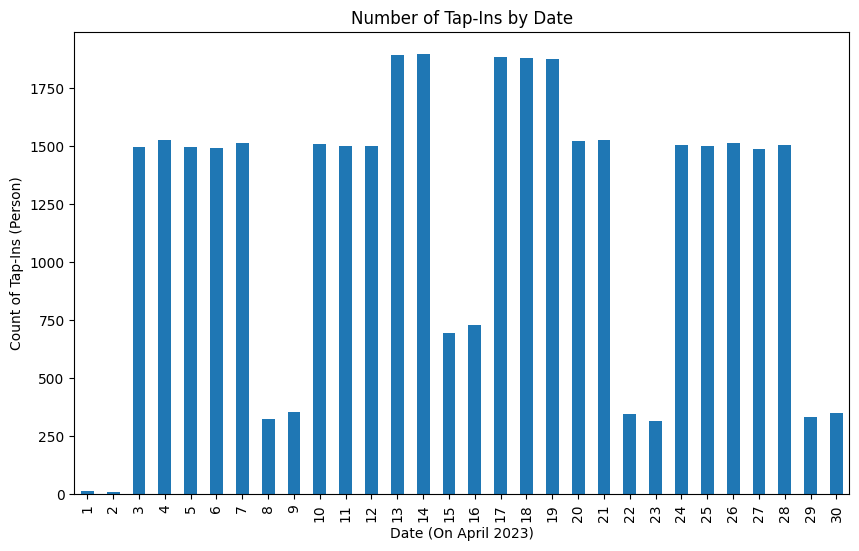

In [511]:
plt.figure(figsize=(10, 6))
df.groupby('tapInDate')['tapInDate'].count().sort_index(ascending=True).plot(kind='bar')
# Adding titles and labels
plt.title('Number of Tap-Ins by Date')
plt.xticks(rotation=90)
plt.xlabel('Date (On April 2023)')
plt.ylabel('Count of Tap-Ins (Person)')

# Show the plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2792\3928307689.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_tap_in_by_day_df, x='tapInDay', y='TotalTapIn', palette='Set3')


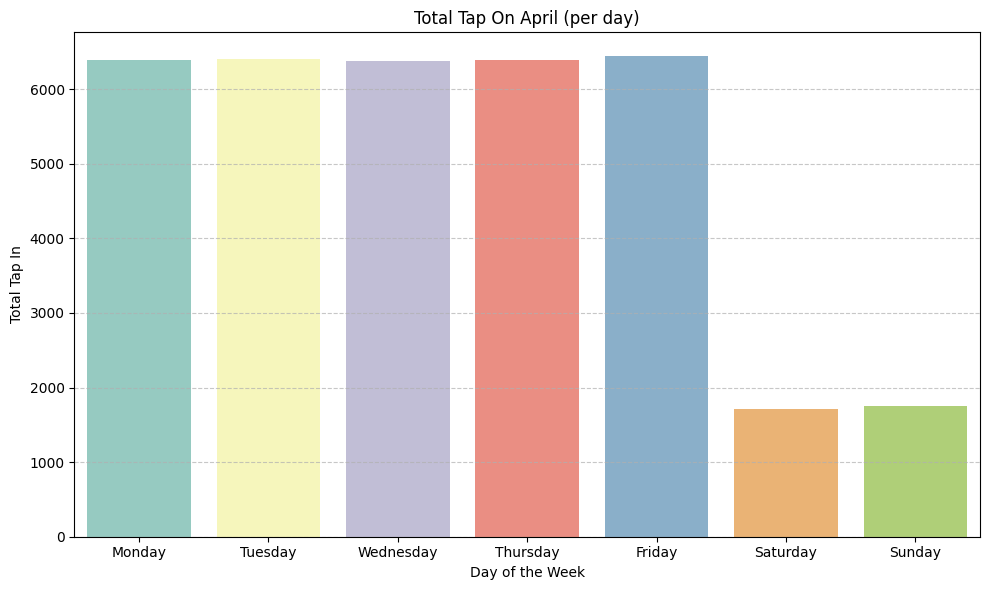

In [512]:
# Days of the week in order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate total tap-ins by day
total_tap_in_by_day = df['tapInDay'].value_counts().reindex(days_of_week, fill_value=0)

# Convert to DataFrame for Seaborn
total_tap_in_by_day_df = total_tap_in_by_day.reset_index()
total_tap_in_by_day_df.columns = ['tapInDay', 'TotalTapIn']

# Create a single plot
plt.figure(figsize=(10, 6))
sns.barplot(data=total_tap_in_by_day_df, x='tapInDay', y='TotalTapIn', palette='Set3')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Tap In')
plt.title('Total Tap On April (per day)')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for y-axis

# Show the plot
plt.tight_layout()
plt.show()


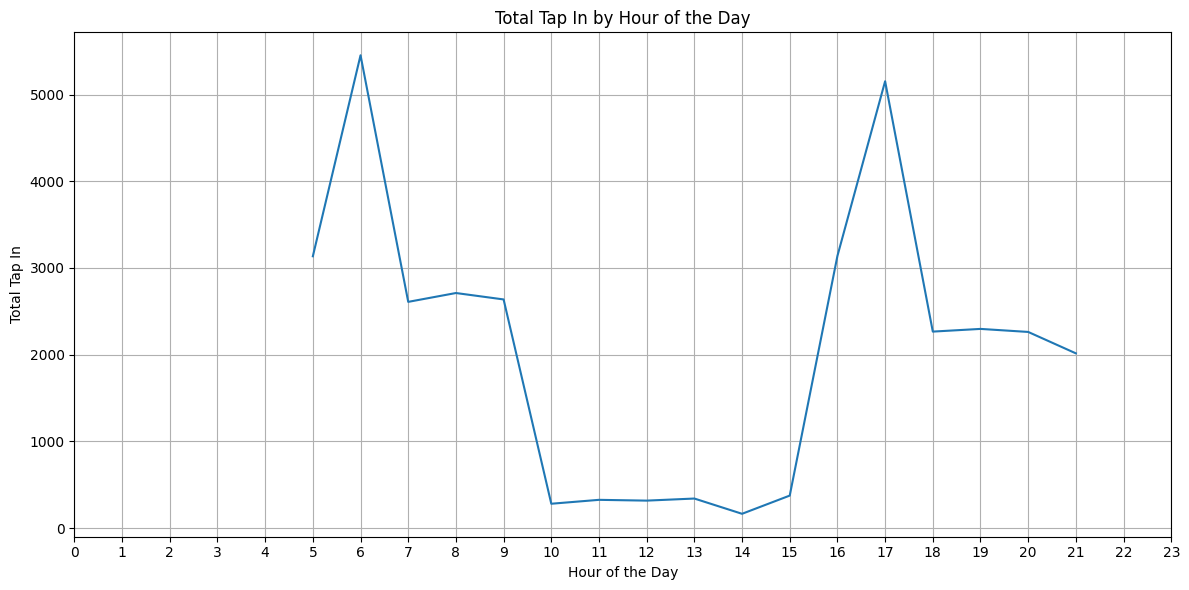

In [513]:
# Assume 'tapInHour' represents hours from 0 to 23
# Calculate total tap-ins by hour
total_tap_in_by_hour = df['tapInHour'].value_counts().reindex()

# Convert to DataFrame for Seaborn
total_tap_in_by_hour_df = total_tap_in_by_hour.reset_index()
total_tap_in_by_hour_df.columns = ['Hour', 'TotalTapIn']

# Create a single plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_tap_in_by_hour_df, x='Hour', y='TotalTapIn')

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Tap In')
plt.title('Total Tap In by Hour of the Day')

# Set x-axis ticks to display every hour
plt.xticks(range(24))

# Adding grid lines for y-axis
plt.grid(axis='both')

# Show the plot
plt.tight_layout()
plt.show()



- **Transjakarta** memiliki penumpang yang tinggi pada hari kerja, dan menurun saat hari libur
- **Transjakarta** memiliki jam sibuk atau *peak hour* sekitar pukul 6 pagi serta pukul 4-5 sore

# Corridor Analysis

### 1. Analisis Kepadatan dan Durasi Perjalanan Rata-Rata Koridor  

Corridor **Transjakarta** yang akan dianalisa adalah 'corridorID' yang merupakan 'type' **BRT**, dengan batasan waktu Senin - Jumat

In [514]:
df_without_weekend = df[~df['tapInDay'].isin(['Saturday', 'Sunday'])]
df_without_weekend_BRT = df_without_weekend[df_without_weekend['type'] == 'BRT']
df_without_weekend_BRT

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,...,payAmount,tapInHour,tapOutHour,tapInDay,tapOutDay,tapInDate,journeyTime,type,Indatetime,Outdatetime
0,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,...,3500.0,5,6,Monday,Monday,3,39.150000,BRT,05:21,06:00
4,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,...,3500.0,6,6,Monday,Monday,3,39.466667,BRT,06:17,06:57
12,dki,Shakila Maryadi,F,1988,9A,PGC 2 - Grogol 2,1.0,Slipi Petamburan Arah Selatan,-6.201948,106.79998,...,3500.0,6,7,Monday,Monday,3,53.450000,BRT,06:15,07:08
13,dki,Danuja Usada,F,2002,4,Pulo Gadung 2 - Tosari,1.0,Pasar Rumput,-6.207125,106.84112,...,3500.0,6,7,Monday,Monday,3,55.350000,BRT,06:12,07:07
16,brizzi,Sari Nababan,F,2004,13,Ciledug - Tendean,1.0,JORR,-6.236104,106.75488,...,3500.0,6,7,Monday,Monday,3,57.900000,BRT,06:49,07:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37883,flazz,"Genta Utama, S.E.I",M,1986,3,Kalideres - Bundaran HI via Veteran,1.0,Petojo,-6.169984,106.81698,...,3500.0,15,17,Wednesday,Wednesday,19,164.283333,BRT,15:14,17:58
37887,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,Velodrome,-6.193468,106.88830,...,3500.0,14,15,Tuesday,Tuesday,4,46.450000,BRT,14:52,15:38
37895,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,...,3500.0,18,19,Friday,Friday,21,97.200000,BRT,18:18,19:55
37896,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,...,3500.0,21,22,Tuesday,Tuesday,18,35.850000,BRT,21:52,22:28


In [515]:
# Menghitung rata-rata journeyTime untuk direction 0
df_direction_0 = df_without_weekend_BRT[df_without_weekend_BRT['direction'] == 0] \
    .groupby('corridorID')['journeyTime'].mean() \
    .reset_index(name='Mean Journey Time (Direction 0)') \
    .sort_values(by='Mean Journey Time (Direction 0)', ascending=False)

# Menghitung rata-rata journeyTime untuk direction 1
df_direction_1 = df_without_weekend_BRT[df_without_weekend_BRT['direction'] == 1] \
    .groupby('corridorID')['journeyTime'].mean() \
    .reset_index(name='Mean Journey Time (Direction 1)') \
    .sort_values(by='Mean Journey Time (Direction 1)', ascending=False)

# Menghitung Trip Count per corridorName, corridorID, dan type
df_trip_count = df_without_weekend_BRT.groupby(['corridorName', 'corridorID', 'type']) \
    .size().reset_index(name='Trip Count') \
    .sort_values('Trip Count', ascending=False) \
    .reset_index(drop=True)

# Join rata-rata journey time dari kedua arah dengan Trip Count berdasarkan corridorID
df_combined = df_trip_count \
    .merge(df_direction_0, on='corridorID', how='left') \
    .merge(df_direction_1, on='corridorID', how='left')

# Menampilkan hasil
df_combined


,corridorName,corridorID,type,Trip Count,Mean Journey Time (Direction 0),Mean Journey Time (Direction 1)
0,Pulo Gadung - Monas,2,BRT,311,62.900108,80.651816
1,Kalideres - Bundaran HI via Veteran,3,BRT,288,75.191253,64.636848
2,Blok M - Kota,1,BRT,269,69.966917,68.973039
3,Ragunan - Gelora Bung Karno,6V,BRT,241,69.425069,64.608472
4,Tanjung Priok - Pluit,12,BRT,237,62.994028,76.402564
5,Pinang Ranti - Pramuka,9N,BRT,230,64.735507,79.719855
6,Matraman Baru - Ancol,5,BRT,229,70.736782,75.535546
7,PGC - Juanda,5C,BRT,228,53.444196,80.643534
8,Ciledug - Tendean,13,BRT,226,77.217949,58.049694
9,Puri Beta - Pancoran Barat,13B,BRT,207,73.883663,73.102830


<Axes: xlabel='Trip Count', ylabel='Mean Journey Time (Direction 0)'>

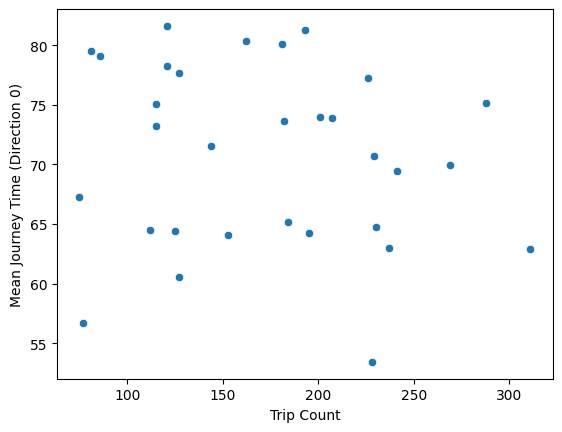

In [516]:
sns.scatterplot(data=df_combined, x='Trip Count',y='Mean Journey Time (Direction 0)')

<Axes: xlabel='Trip Count', ylabel='Mean Journey Time (Direction 1)'>

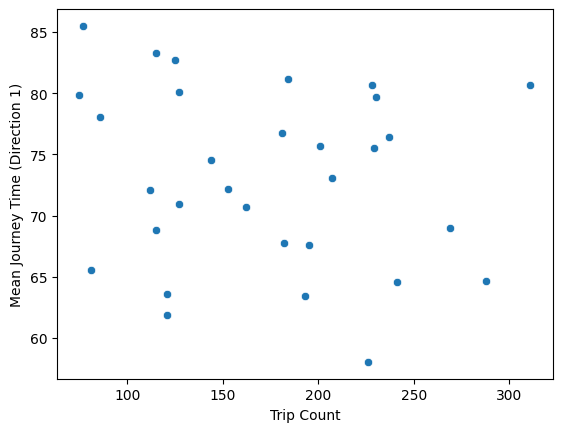

In [517]:
sns.scatterplot(data=df_combined, x='Trip Count',y='Mean Journey Time (Direction 1)')

- dapat terlihat bahwa dari arah sejalan maupun yang berlawanan tidak menunjukkan hubungan linear antar terhadap rata=rata perjalanan. Oleh karena itu, perlu analisis secara spesifik mengenai waktu waktu tertentu.

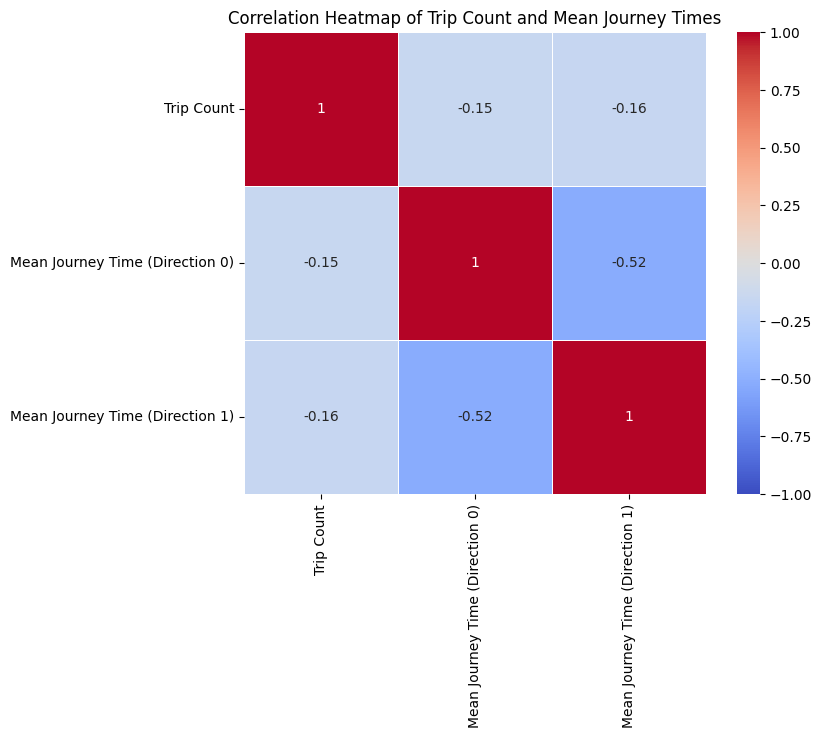

In [518]:
# Menghitung korelasi antar-kolom
corr_matrix = df_combined[['Trip Count', 'Mean Journey Time (Direction 0)', 'Mean Journey Time (Direction 1)']].corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)

# Menambahkan judul
plt.title('Correlation Heatmap of Trip Count and Mean Journey Times')
plt.show()


- Tiap koridor memiliki hubungan yang sedang antara waktu keberangkatan koridor pada dua arah koridor yang berbeda

### 2. Analisis 'Corridor' dengan 'Peak Hour'

- Menganalisa untuk rata-rata waktu satu koridor pada *peak hour*, yaitu pagi dan sore 
- Waktu pagi (morning) yaitu pukul 05.00 - 10.00 dan sore (afternoon) yaitu 16.00 - 20.00

In [519]:
# Filter data untuk waktu sebelum jam 9 (pagi)
morning_hour = df_without_weekend_BRT[(df_without_weekend_BRT['tapInHour'] <= 9) & (df_without_weekend_BRT['tapInHour'] >= 6)]

# Menghitung rata-rata journeyTime per corridorID untuk jam puncak pagi
morning_peak_hour = morning_hour.groupby('corridorID')['journeyTime'].median().reset_index()

# Mengganti nama kolom 'journeyTime' menjadi 'Mean Journey Time (Direction 0)' dan mengurutkan berdasarkan nilai
morning_peak_hour = morning_peak_hour.rename(columns={'journeyTime': 'Mean Journey Time (06.00 - 09.00)'}) \
    .sort_values(by='Mean Journey Time (06.00 - 09.00)', ascending=False)

# Menampilkan hasil
morning_peak_hour = morning_peak_hour.reset_index(drop='index')


In [520]:
morning_peak_hour

,corridorID,Mean Journey Time (06.00 - 09.00)
0,9,82.225000
1,8,76.500000
2,7,74.050000
3,9C,73.916667
4,6A,70.366667
5,4D,70.316667
6,13B,66.400000
7,6,65.866667
8,7F,64.866667
9,9A,63.341667


In [521]:
# Filter data untuk waktu sebelum jam 9 (pagi)
afternoon_hour = df_without_weekend_BRT[(df_without_weekend_BRT['tapInHour'] <= 19) & (df_without_weekend_BRT['tapInHour'] >= 16)]

# Menghitung rata-rata journeyTime per corridorID untuk jam puncak pagi
afternoon_peak_hour= afternoon_hour.groupby(['corridorID'])['journeyTime'].median().reset_index()

# Mengganti nama kolom 'journeyTime' menjadi 'Mean Journey Time (Direction 0)' dan mengurutkan berdasarkan nilai
afternoon_peak_hour = afternoon_peak_hour.rename(columns={'journeyTime': 'Mean Journey Time (16.00-19.00)'}) \
    .sort_values(by='Mean Journey Time (16.00-19.00)', ascending=False)

# Menampilkan hasil
afternoon_peak_hour = afternoon_peak_hour.reset_index(drop='index')

In [522]:
afternoon_peak_hour

,corridorID,Mean Journey Time (16.00-19.00)
0,4D,98.916667
1,5D,94.833333
2,10,90.816667
3,6V,88.766667
4,3F,88.550000
5,7,88.433333
6,5C,86.783333
7,10D,86.775000
8,9,86.266667
9,5,86.266667


Rata-rata Kecepatan transjakarta pada saat pagi hari adalah 20.1 km/jam, dan sore hari yaitu 21.5 km/jam </br>
Sumber :https://journal.unj.ac.id/unj/index.php/logistik/article/download/11156/6947/

 Sehingga waktu ideal dapat diperoleh dengan yaitu **waktu_ideal = distance / waktu** </br>
 

In [523]:
brt_data = df[df['type'] == 'BRT']
import pandas as pd
from geopy.distance import geodesic

# Fungsi untuk menghitung jarak Haversine
def calculate_distance(row):
    start = (row['tapInStopsLat'], row['tapInStopsLon'])
    end = (row['tapOutStopsLat'], row['tapOutStopsLon'])
    return geodesic(start, end).kilometers

# Tambahkan kolom jarak perjalanan ke dalam dataframe
brt_data['distance_km'] = brt_data.apply(calculate_distance, axis=1)

# Menghitung jarak maksimum untuk setiap user dan direction
max_distance_per_user_direction = brt_data.groupby(['corridorID', 'direction'])['distance_km'].max().reset_index()

# Output hasil
max_distance_per_user_direction


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2792\2453694651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brt_data['distance_km'] = brt_data.apply(calculate_distance, axis=1)


,corridorID,direction,distance_km
0,1,0.0,11.986633
1,1,1.0,10.527187
2,10,0.0,14.998131
3,10,1.0,12.613415
4,10D,0.0,20.931134
...,...,...,...
57,9C,1.0,8.401099
58,9N,0.0,4.104899
59,9N,1.0,4.104899
60,L13E,0.0,11.996005


In [551]:
brt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5867 entries, 0 to 37899
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   payCardBank                 5867 non-null   object        
 1   payCardName                 5867 non-null   object        
 2   payCardSex                  5867 non-null   object        
 3   payCardBirthDate            5867 non-null   int64         
 4   corridorID                  5867 non-null   object        
 5   corridorName                5867 non-null   object        
 6   direction                   5867 non-null   float64       
 7   tapInStopsName              5867 non-null   object        
 8   tapInStopsLat               5867 non-null   float64       
 9   tapInStopsLon               5867 non-null   float64       
 10  stopStartSeq                5867 non-null   int64         
 11  tapInTime                   5867 non-null   datetime64[ns]
 

In [547]:
brt_data['estimate_ideal_journeyTime'] = (brt_data['distance_km'] / 20.1)*60

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2792\364846284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brt_data['estimate_ideal_journeyTime'] = (brt_data['distance_km'] / 20.1)*60


In [548]:
brt_data

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,tapInStopsLat,tapInStopsLon,...,tapOutHour,tapInDay,tapOutDay,tapInDate,journeyTime,type,Indatetime,Outdatetime,distance_km,estimate_ideal_journeyTime
0,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,-6.184631,106.84402,...,6,Monday,Monday,3,39.150000,BRT,05:21,06:00,2.506718,7.482741
4,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,-6.149650,106.88900,...,6,Monday,Monday,3,39.466667,BRT,06:17,06:57,8.730128,26.060084
12,dki,Shakila Maryadi,F,1988,9A,PGC 2 - Grogol 2,1.0,Slipi Petamburan Arah Selatan,-6.201948,106.79998,...,7,Monday,Monday,3,53.450000,BRT,06:15,07:08,2.596640,7.751165
13,dki,Danuja Usada,F,2002,4,Pulo Gadung 2 - Tosari,1.0,Pasar Rumput,-6.207125,106.84112,...,7,Monday,Monday,3,55.350000,BRT,06:12,07:07,1.737260,5.185850
16,brizzi,Sari Nababan,F,2004,13,Ciledug - Tendean,1.0,JORR,-6.236104,106.75488,...,7,Monday,Monday,3,57.900000,BRT,06:49,07:47,0.777900,2.322089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37883,flazz,"Genta Utama, S.E.I",M,1986,3,Kalideres - Bundaran HI via Veteran,1.0,Petojo,-6.169984,106.81698,...,17,Wednesday,Wednesday,19,164.283333,BRT,15:14,17:58,2.633280,7.860539
37887,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,Velodrome,-6.193468,106.88830,...,15,Tuesday,Tuesday,4,46.450000,BRT,14:52,15:38,2.186730,6.527551
37895,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,-6.196892,106.82309,...,19,Friday,Friday,21,97.200000,BRT,18:18,19:55,10.403695,31.055807
37896,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,-6.290154,106.88116,...,22,Tuesday,Tuesday,18,35.850000,BRT,21:52,22:28,0.582165,1.737805


In [550]:
brt_data.to_excel('brt_data.xlsx', index=False)

In [552]:
df.to_excel('df.xlsx', index=False)

In [553]:
df_combined.to_excel('df_combined.xlsx', index=False)

- Tabel diatas merupakan jarak terjauh seseorang untuk mencapai tujuan dalam tiap-tiap corridorID
- Untuk mengetahui jarak koridor dengan dua arah (direction = 0 dan direction = 1), misal jarak terjauh dalam satu arah merupakan jarak dari satu koridor
- Oleh karena itu, maka akan diperoleh tabenl penjumlahan jarak terjauh untuk masing-masing direction untuk tiap-tiap corridorID hanya untuk data ini

In [525]:
max_distance_per_user_direction2 =pd.DataFrame(max_distance_per_user_direction.groupby('corridorID')['distance_km'].sum()).reset_index()
max_distance_per_user_direction2

,corridorID,distance_km
0,1,22.513820
1,10,27.611546
2,10D,39.422070
3,10H,27.935336
4,11,12.292841
5,12,18.588733
6,13,18.697855
7,13B,22.460491
8,14,8.026167
9,2,16.371520


In [526]:
max_distance_per_user_direction2['Ideal Time'] = (max_distance_per_user_direction2['distance_km'] / 20.1)*60
max_distance_per_user_direction2

,corridorID,distance_km,Ideal Time
0,1,22.513820,67.205433
1,10,27.611546,82.422525
2,10D,39.422070,117.677822
3,10H,27.935336,83.389062
4,11,12.292841,36.695048
5,12,18.588733,55.488755
6,13,18.697855,55.814492
7,13B,22.460491,67.046242
8,14,8.026167,23.958709
9,2,16.371520,48.870210


In [540]:
morning_corridor_time = pd.merge(morning_peak_hour,max_distance_per_user_direction2,on='corridorID')
morning_corridor_time['difference'] = morning_corridor_time['Mean Journey Time (06.00 - 09.00)'] - morning_corridor_time['Ideal Time']
morning_corridor_time.sort_values(by='difference',ascending = False).reset_index(drop='index').head()

,corridorID,Mean Journey Time (06.00 - 09.00),distance_km,Ideal Time,difference
0,4D,70.316667,10.291711,30.721524,39.595143
1,9N,59.950000,8.209799,24.506862,35.443138
2,7,74.050000,14.032542,41.888186,32.161814
3,6A,70.366667,13.964839,41.686087,28.680580
4,3H,50.100000,8.307962,24.799886,25.300114


- corridorID = 4D,9N, 7, 6A, dan 3H merupakan koridor yang memiliki selisih rata-rata waktu dengan estimasi waktu ideal yang tertinggi untuk pukul 06.00 - 09.00


In [541]:
afternoon_corridor_time = pd.merge(afternoon_peak_hour,max_distance_per_user_direction2,on='corridorID')
afternoon_corridor_time['difference'] = afternoon_corridor_time['Mean Journey Time (16.00-19.00)'] - afternoon_corridor_time['Ideal Time']
afternoon_corridor_time.sort_values(by='difference',ascending = False).reset_index(drop='index').head()

,corridorID,Mean Journey Time (16.00-19.00),distance_km,Ideal Time,difference
0,4D,98.916667,10.291711,30.721524,68.195143
1,3H,86.016667,8.307962,24.799886,61.216781
2,9N,84.683333,8.209799,24.506862,60.176471
3,14,83.741667,8.026167,23.958709,59.782958
4,11,83.333333,12.292841,36.695048,46.638286


- corridorID = 4D,3H, 9N, 14. 11 merupakan koridor yang memiliki selisih rata-rata waktu dengan estimasi waktu ideal yang tertinggi untuk pukul 16.00 - 19.00


Koridor 4D, 3H, dan 9N merupakan koridor yang memiliki tingkat keterlambatan tertinggi pada pagi dan sore hari
- 4D : Pulo Gadung 2 - Kuningan	
- 3H : Jelambar - Kota
- 9N : Pinang Ranti - Pramuka

## Kesimpulan

Berdasarkan analisis terhadap data Transjakarta, beberapa kesimpulan yang dapat diambil adalah sebagai berikut:

1. **Identifikasi Kepadatan Penumpang per Koridor**: Beberapa koridor memiliki tingkat kepadatan penumpang yang tinggi, khususnya pada jam-jam sibuk. Hal ini menunjukkan bahwa layanan di koridor tertentu perlu ditingkatkan atau dioptimalkan untuk mengakomodasi penumpang secara lebih baik.
  
2. **Rute yang Paling Sering Dilalui**: Rute-rute tertentu dilalui oleh penumpang dalam jumlah besar, yang menandakan pentingnya rute tersebut bagi masyarakat. Rute ini perlu diprioritaskan dalam hal frekuensi layanan dan ketersediaan armada untuk memastikan kenyamanan dan kemudahan akses bagi penumpang.

3. **Waktu Operasional yang Efektif**: Analisis waktu operasional pada satu koridor menunjukkan pola jam sibuk di mana penumpang lebih banyak melakukan tap-in dan tap-out. Ini memberikan gambaran mengenai jam-jam penting di mana layanan perlu dioptimalkan untuk menghindari penumpukan penumpang dan memastikan kelancaran perjalanan.

## Rekomendasi

Berdasarkan kesimpulan di atas, berikut adalah beberapa rekomendasi yang dapat diterapkan oleh Transjakarta:

1. **Penyesuaian Kapasitas Layanan di Koridor Ramai**:
   - Tingkatkan frekuensi bus di koridor dengan kepadatan tinggi, terutama selama jam sibuk, untuk mengurangi penumpukan penumpang dan meningkatkan kenyamanan.
   - Tambahkan armada bus di rute yang paling sering dilalui pada jam sibuk untuk memenuhi kebutuhan penumpang secara optimal.

2. **Optimalisasi Jadwal Operasional**:
   - Sesuaikan jadwal operasional berdasarkan pola jam sibuk dan tidak sibuk pada koridor tertentu. Dengan ini, Transjakarta dapat mengurangi waktu tunggu bagi penumpang dan mengoptimalkan penggunaan sumber daya.
   - Pertimbangkan untuk mengurangi frekuensi layanan di luar jam sibuk pada koridor dengan jumlah penumpang rendah, sehingga armada dan sumber daya lainnya dapat dialokasikan secara lebih efisien.
   - koridor dengan penumpang sepi untuk terus dioptimalkan untuk waktu keberangkatan dan juga kedatangan beberapa halte, sehingga waktu perjalanan tetap sesuai dengan estimasi yang diinginkan

3. **Evaluasi Rute dan Koridor Secara Berkala**:
   - Lakukan evaluasi rute dan koridor secara berkala untuk memastikan bahwa layanan Transjakarta selalu sesuai dengan kebutuhan penumpang, terutama dengan perubahan pola transportasi atau kebutuhan perjalanan.
   - Identifikasi koridor dengan tingkat penggunaan rendah dan pertimbangkan kemungkinan untuk mengintegrasikannya dengan koridor lain yang lebih ramai atau memberikan alternatif rute untuk meningkatkan efisiensi.

Dengan menerapkan rekomendasi ini, Transjakarta diharapkan dapat meningkatkan kenyamanan, efisiensi, dan aksesibilitas layanan bagi masyarakat, sehingga tetap menjadi solusi transportasi yang efektif untuk mengurangi kemacetan di Jakarta.
